# 日期和時間
### 黃孟婷
**June 23, 2023**

---

# 簡介
```
本章將介紹如何使用 Python 中的日期和時間。
雖然這是一個貼近生活的主題，但是當我們越了解卻發現這裡的問題是複雜的。
以下三個簡單的問題讓大家思考一下：

1.每年都有 365 天嗎？
2.每天都有 24 小時嗎？
3.每分鐘都有 60 秒嗎？

大家都知道不是每年都有 365 天，但是你知道一年是否為閏年的確切規則嗎？
有些人可能不記得世界上很多地方都使用夏令時（DST），所以有些時候一天有 23 個小時，有些則有 25 個。
而有些人可能不知道有些時間有 61 秒因為由於地球的自轉速度逐漸減慢，所以偶爾會增加閏秒。
```

# 套件
本章將重點介紹 pendulum 套件，它可以更容易地處理日期和時間。<br>
另外，我們使用 R 中 nycflights13 套件內的航班資料來作練習。

In [1]:
# pip install pendulum
import pendulum
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# 產生日期/時間的方式
```
1.使用 datetime 模塊
2.使用 dateutil 模塊
3.使用 arrow 模塊
4.使用 pendulum 模塊

我們從最常見最簡單的數據類型開始介紹：

要獲取當前日期或日期時間，可以使用 pendulum.today() 或 pendulum.now()。
另外，可由 format() 結合 A 參數，判斷時間是早上或是下午：
```

In [2]:
# 當前日期
current_date = pendulum.today()
print(current_date)

2023-07-05T00:00:00+08:00


In [3]:
# 當前日期和時間
current_datetime = pendulum.now()
print(current_datetime)

2023-07-05T02:13:31.888973+08:00


In [4]:
# 格式化為 AM/PM 時間
formatted_time = current_datetime.format('A')

# 判断上午或下午
if formatted_time == 'AM':
    print("現在是上午")
else:
    print("現在是下午")

現在是上午


建立日期/時間的三種方法：

1. 從一個字串。
2. 從個別日期時間元素。
3. 從現有的日期/時間對象。

## 字串
日期/時間資料通常以字串形式出現，我們可以使用 **pendulum.parse()** 方法來解析日期字符串，並將其轉換為 Pendulum 日期對象 :

In [5]:
# 解析字符串為日期和時間
parsed_datetime = pendulum.parse('2023-06-21 10:30:00')
print(parsed_datetime)

2023-06-21T10:30:00+00:00


In [6]:
# 解析日期字符串並獲取日期部分
date_str = '2023-06-21 10:30:00'
date = pendulum.parse(date_str).date()

print(date)

2023-06-21


+ 設置 strict = False 來允許解析非標準格式的日期字符串

In [7]:
date_str = "March 21st, 2023"
dt = pendulum.parse(date_str, strict=False)

print(dt)

2023-03-21T00:00:00+00:00


In [8]:
date_str = "21-Mar-2023"
dt = pendulum.parse(date_str, strict=False)

print(dt)

2023-03-21T00:00:00+00:00


In [9]:
date_str = '20230321'
dt = pendulum.parse(date_str, strict=False)

print(dt)

2023-03-21T00:00:00+00:00


In [10]:
date_str = '2023/03/21'
dt = pendulum.parse(date_str, strict=False)

print(dt)

2023-03-21T00:00:00+00:00


不帶引號的數字需先轉換成字串
+ **pendulum.from_format()**

In [11]:
date_str = 20230321
dt = pendulum.from_format(str(date_str), 'YYYYMMDD')
print(dt)

2023-03-21T00:00:00+00:00


In [12]:
current_datetime = pendulum.now()
print(current_datetime)
formatted_datetime = current_datetime.format('YYYY-MM-DD HH:mm:ss')
print(formatted_datetime)

2023-07-05T02:13:32.028751+08:00
2023-07-05 02:13:32


以下是一些常用的日期格式化選項：

符號|	格式	      |範例
----|-------------|------
'YYYY' |表示四位數的年份|2023
'YY' |兩位數的年份|23
'MM' |表示兩位數的月份|01、02、03
'M' |月份（沒有前導零)|1、2、3
'DD' |表示兩位數的日期|01、02、03
'D' |日期（沒有前導零)|1、2、3
'HH' |24小時制的小時數|01、02、13、23
'hh' |12小時制的小時數|01、02、01、11
'mm' |分鐘數|00、01、30、59
'ss' |秒數|00、01、30、59
'SSS' |毫秒數|000、001、500、999

### 創建特定日期和時間
+ pendulum.datetime()

1. 創建特定日期和時間的 Pendulum 對象

In [13]:
dt = pendulum.datetime(2023, 6, 1, 12, 30, 0)  # 2023 年 6 月 1 日 12:30:00
print(dt)

2023-06-01T12:30:00+00:00


2. 創建只有日期的 Pendulum 對象

In [14]:
date = pendulum.datetime(2023, 6, 1).date()  # 2023 年 6 月 1 日（只有日期）
print(date)

2023-06-01


3. 創建只有時間的 Pendulum 對象

In [15]:
time = pendulum.time(12, 30, 0)  # 只有時間
print(time)

12:30:00


還可以通過提供時區強制從日期創建日期時間

In [16]:
now = pendulum.datetime(2023, 6, 21, tz="America/New_York")  # 使用紐約時區創建日期和時間對象
print(now)

2023-06-21T00:00:00-04:00


In [17]:
now = pendulum.datetime(2023, 6, 21, tz="UTC") 
print(now)

2023-06-21T00:00:00+00:00


常見時區 :
+ 紐約時區："America/New_York"
+ 倫敦時區："Europe/London"
+ 東京時區："Asia/Tokyo"
+ 北京時區："Asia/Shanghai"
+ 悉尼時區："Australia/Sydney"
+ 協調世界時（Coordinated Universal Time）的標準時區 : "UTC"

## 從個別日期時間元素
有時候，散落在各行的元素可相結合，並創造一個日期時間。以下我們討論航班資料的例子：

首先，看一下資料的樣貌和變數

In [18]:
flights = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\10_時間與日期\flights_data.csv")
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


要從此類創建日期/時間，請使用 pd.to_datetime() 創建日期時間：

In [19]:
flights_datetime = flights[['year', 'month', 'day', 'hour', 'minute']].copy()
flights_datetime['departure'] = pd.to_datetime(flights_datetime)
flights_datetime.head()

,year,month,day,hour,minute,departure
0,2013,1,1,5,15,2013-01-01 05:15:00
1,2013,1,1,5,29,2013-01-01 05:29:00
2,2013,1,1,5,40,2013-01-01 05:40:00
3,2013,1,1,5,45,2013-01-01 05:45:00
4,2013,1,1,6,0,2013-01-01 06:00:00


```
由於 dep_time, sched_dep_time, arr_time, sched_arr_time 等的原始表示方式是三或四位數字，
最後兩位代表分鐘，我們在 make_datetime_100 函式中先將小時與分鐘切開，才進行轉換。
```

提醒 :
1. // : 整數除法 ; % : 餘數除法
2. 在 flights.dropna 函數中我們輸入要篩選的資料框
3. col.endswith : 選擇結尾是 delay 或 time 的變數

In [20]:
def make_datetime_100(year, month, day, time):
    if math.isnan(time):
        return None
    time_parts = str(int(time)).zfill(4)
    hour = int(time_parts[:2])
    minute = int(time_parts[2:])
    if hour >= 24:
        hour = hour % 24
    return pendulum.datetime(year, month, day, hour, minute)

# 過濾缺失值
flights_filtered = flights.dropna(subset=['dep_time', 'arr_time'])

# 對時間列進行變換
flights_filtered.loc[:, 'dep_time'] = flights_filtered.apply(lambda row: make_datetime_100(row['year'], row['month'], row['day'], row['dep_time']), axis=1)
flights_filtered.loc[:, 'arr_time'] = flights_filtered.apply(lambda row: make_datetime_100(row['year'], row['month'], row['day'], row['arr_time']), axis=1)
flights_filtered.loc[:, 'sched_dep_time'] = flights_filtered.apply(lambda row: make_datetime_100(row['year'], row['month'], row['day'], row['sched_dep_time']), axis=1)
flights_filtered.loc[:, 'sched_arr_time'] = flights_filtered.apply(lambda row: make_datetime_100(row['year'], row['month'], row['day'], row['sched_arr_time']), axis=1)

# 選擇特定的列
selected_columns = ['origin', 'dest'] + [col for col in flights_filtered.columns if col.endswith('delay')] + [col for col in flights_filtered.columns if col.endswith('time')]
flights_dt = flights_filtered[selected_columns]

C:\Users\user\AppData\Local\Temp\ipykernel_16152\2811225223.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_filtered.loc[:, 'dep_time'] = flights_filtered.apply(lambda row: make_datetime_100(row['year'], row['month'], row['day'], row['dep_time']), axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_16152\2811225223.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_filtered.loc[:, 'arr_time'] = flights_filtered.apply(lambda row: make_datetime_100(row['year'], row['month'], row['day'], 

有了這些數據，我們可以看到全年的出發時間分佈：

In [21]:
flights_dt.head()

,origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
0,EWR,IAH,2.0,11.0,2013-01-01 05:17:00+00:00,2013-01-01 05:15:00+00:00,2013-01-01 08:30:00+00:00,2013-01-01 08:19:00+00:00,227.0
1,LGA,IAH,4.0,20.0,2013-01-01 05:33:00+00:00,2013-01-01 05:29:00+00:00,2013-01-01 08:50:00+00:00,2013-01-01 08:30:00+00:00,227.0
2,JFK,MIA,2.0,33.0,2013-01-01 05:42:00+00:00,2013-01-01 05:40:00+00:00,2013-01-01 09:23:00+00:00,2013-01-01 08:50:00+00:00,160.0
3,JFK,BQN,-1.0,-18.0,2013-01-01 05:44:00+00:00,2013-01-01 05:45:00+00:00,2013-01-01 10:04:00+00:00,2013-01-01 10:22:00+00:00,183.0
4,LGA,ATL,-6.0,-25.0,2013-01-01 05:54:00+00:00,2013-01-01 06:00:00+00:00,2013-01-01 08:12:00+00:00,2013-01-01 08:37:00+00:00,116.0


C:\Users\user\AppData\Local\Temp\ipykernel_16152\2045802781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_dt['departure'] = flights_dt['dep_time'].dt.date


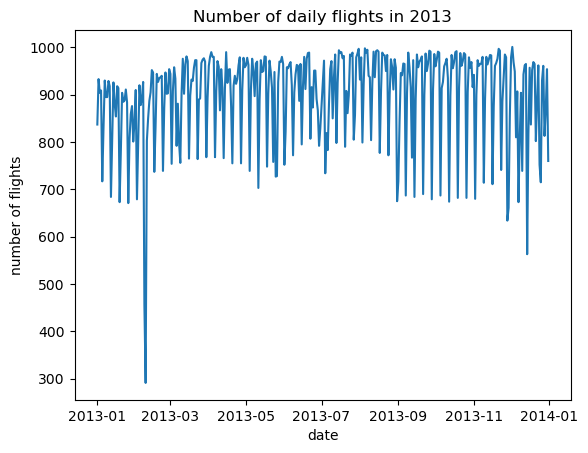

In [22]:
# 創日期列
flights_dt['departure'] = flights_dt['dep_time'].dt.date

#統計每日航班數
freq = flights_dt.groupby('departure').size().reset_index(name='count')

# 繪製折線圖
plt.plot(freq['departure'], freq['count'])
plt.title('Number of daily flights in 2013')
plt.xlabel('date')
plt.ylabel('number of flights')
plt.show()

或者在一天之內 (下圖顯示 2013/01/01 的航班)：

C:\Users\user\AppData\Local\Temp\ipykernel_16152\1315205826.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  flight0101 = flights_dt[flights_dt['departure'] < pd.to_datetime('2013-01-02')].copy()


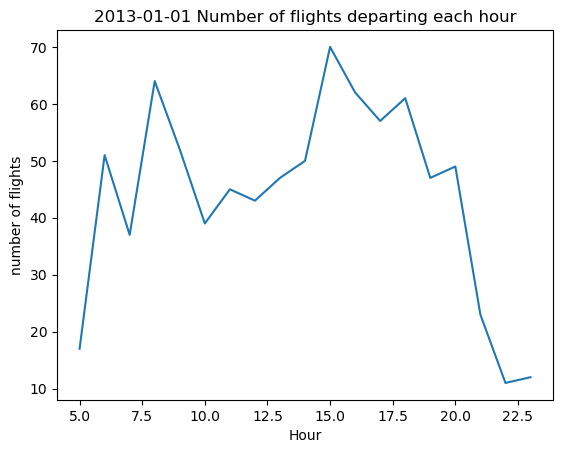

In [23]:
flight0101 = flights_dt[flights_dt['departure'] < pd.to_datetime('2013-01-02')].copy()
flight0101['freq_hour'] = flight0101['dep_time'].dt.hour

# Count flights for each hour
flight_counts = flight0101['freq_hour'].value_counts().sort_index()

# Plot line graph
plt.plot(flight_counts.index, flight_counts.values)
plt.xlabel('Hour')
plt.ylabel('number of flights')
plt.title('2013-01-01 Number of flights departing each hour')
plt.show()

## 來自其他類型
使用者可能希望在日期時間和日期之間做轉換。這就是 .time() 和 .date() 的工作：

In [24]:
# 當前日期
current_date = pendulum.today()
print(current_date)

2023-07-05T00:00:00+08:00


In [25]:
# 當前日期和時間
current_datetime = pendulum.now()
print(current_datetime)

2023-07-05T02:14:09.346390+08:00


In [26]:
print(current_date.time())

00:00:00


In [27]:
print(current_datetime.year)

2023


In [28]:
print(current_datetime.date())

2023-07-05


In [29]:
print(current_datetime.time())

02:14:09.346390


+ 換算時間

In [30]:
# 將秒數轉換為 pendulum.Duration 對象
duration = pendulum.Duration(seconds=60 * 60 * 10)

# 輸出: <Duration [0 years, 0 months, 0 days, 10 hours, 0 minutes, 0 seconds]>
print(duration)

# 可以訪問 duration 對象的屬性
print(duration.hours)  

10 hours
10


+ 計算日期間隔

In [31]:
duration = pendulum.Duration(days=365) * 10 + pendulum.Duration(days=2)

# 應用日期間隔到當前日期
date = pendulum.now() - duration
print(date)  # 10 年 2 天前的日期

2013-07-05T02:14:09.440443+08:00


In [32]:
# 可以訪問 duration 對象的屬性
print(duration.in_days()) 

3652


有時使用者會從 1970-01-01 的 “Unix Epoch” 獲得數字移動的日期/時間。<br>
移動量以秒為單位，請使用 from_timestamp()
+ 註：UNIX 是從 UTC 時間 1970 年 01 月 01 日 0 時 0 分 0 秒至今，不考慮閏秒

In [33]:
# Unix時間
timestamp = 60 * 60 * 10

# 使用 from_timestamp() 方法將時間轉換為日期/時間
dt = pendulum.from_timestamp(timestamp)
print(dt)

1970-01-01T10:00:00+00:00


In [34]:
timestamp = 0
dt = pendulum.from_timestamp(timestamp)

# 添加 365*10+2 天
dt_plus_days = dt.add(days=365*10+2)
print(dt_plus_days)

1980-01-01T00:00:00+00:00


# 日期時間元素
本節將介紹取得或設置各個元素的功能。 下一節將介紹算術如何使用日期時間。

## 取得元素
取得日期的各個部分與存取函數 :

+ 年份：year
+ 月份：month
+ 日期（一個月的第幾天）：day
+ 一年中的第幾天：day_of_year
+ 星期幾（一周的第幾天，星期一是第一天）：day_of_week
+ 小時：hour
+ 分鐘：minute
+ 秒：second

In [35]:
dt = pendulum.parse('2023-06-21 10:30:56')
print(dt)

2023-06-21T10:30:56+00:00


In [36]:
print(dt.year)             # 年份
print(dt.month)            # 月份
print(dt.day)              # 日期
print(dt.hour)             # 小時
print(dt.minute)           # 分鐘
print(dt.second)           # 秒
print(dt.day_of_year)      # 一年中的第幾天
print(dt.day_of_week)      # 星期幾（一周的第幾天，星期一是第一天）

2023
6
21
10
30
56
172
3


+ 季度（一季的第幾天，一至三月是第一季度，以此類推）: 在 Pendulum 庫中，沒有直接提供獲取季度中的第幾天的方法

In [37]:
year = dt.year
month = dt.month
day = dt.day

# 獲取季度
quarter = (month - 1) // 3 + 1

# 獲取一季度的第幾天
start_of_quarter = pendulum.datetime(year, (quarter - 1) * 3 + 1, 1)
days_in_quarter = (dt - start_of_quarter).days + 1
print(days_in_quarter)

82


.format() 可以設置 'MMM'、'ddd' 等，指的是回傳月份或星期幾的縮寫名稱。設置 'MMMM'、'dddd' 為回傳全名。

In [38]:
month_m = dt.format('MMM')
month_abbr = dt.format('MMMM')

wday_d = dt.format('ddd')
wday_abbr = dt.format('dddd')

print(month_m, month_abbr, wday_d, wday_abbr)

Jun June Wed Wednesday


In [39]:
# 前 4 天到後 2 天的日期
date_list = [dt.add(days=i) for i in range(-4, 3)]

# 帶有星期幾標籤的日期列表
wday_list = [dt.format('dddd') for dt in date_list]
print(wday_list)

['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


我們可以看到航班在工作日起飛數量：

C:\Users\user\AppData\Local\Temp\ipykernel_16152\57086093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_dt['dep_time'] = pd.to_datetime(flights_dt['dep_time'])
C:\Users\user\AppData\Local\Temp\ipykernel_16152\57086093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_dt['wday'] = flights_dt['dep_time'].dt.day_name()


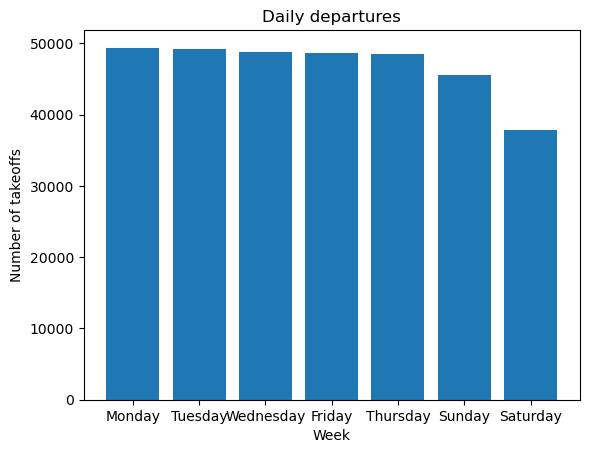

In [40]:
# 將 dep_time 轉換為 Pendulum DateTime 對象
flights_dt['dep_time'] = pd.to_datetime(flights_dt['dep_time'])

# 獲取每天的星期幾
flights_dt['wday'] = flights_dt['dep_time'].dt.day_name()

# 統計每個星期幾的起飛數
flights_by_weekday = flights_dt['wday'].value_counts()

# 繪製柱狀圖
plt.bar(flights_by_weekday.index, flights_by_weekday.values)
plt.xlabel('Week')
plt.ylabel('Number of takeoffs')
plt.title('Daily departures')
plt.show()

## 捨入(Rounding)
產生時間元素的另一種方法是使用 .start_of("") <br>
用於將 DateTime 對象的時間部分重置為特定時間單位的開始。
+ 'year'（年）
+ 'month'（月）
+ 'week'（周）
+ 'day'（日）
+ 'hour'（小时）
+ 'minute'（分钟）
+ 'second'（秒）

In [41]:
# 創建一個 Pendulum DateTime 對象
dt = pendulum.datetime(2023, 7, 1, 10, 31)

# 將時間設置為小時開始，因此分鐘和秒將設置為零 : Floor 
floor_dt = dt.start_of('hour')
print(floor_dt)

floor_dt = dt.start_of('week')
print(floor_dt)

# 模擬 round 方法
round_dt = dt.start_of('minute').add(minutes=30)
print(round_dt)  

# 模擬 ceil 方法
ceil_dt = dt.start_of('day').add(days=1)
print(ceil_dt)

ceil_dt = dt.start_of('month').add(months=1)
print(ceil_dt)

2023-07-01T10:00:00+00:00
2023-06-26T00:00:00+00:00
2023-07-01T11:01:00+00:00
2023-07-02T00:00:00+00:00
2023-08-01T00:00:00+00:00


2013-01-01 那天每小時內有多少飛機起飛 ?

C:\Users\user\AppData\Local\Temp\ipykernel_16152\1454428816.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  flight_count = flights_dt[flights_dt['departure'] < pd.to_datetime('2013-01-02')].copy()


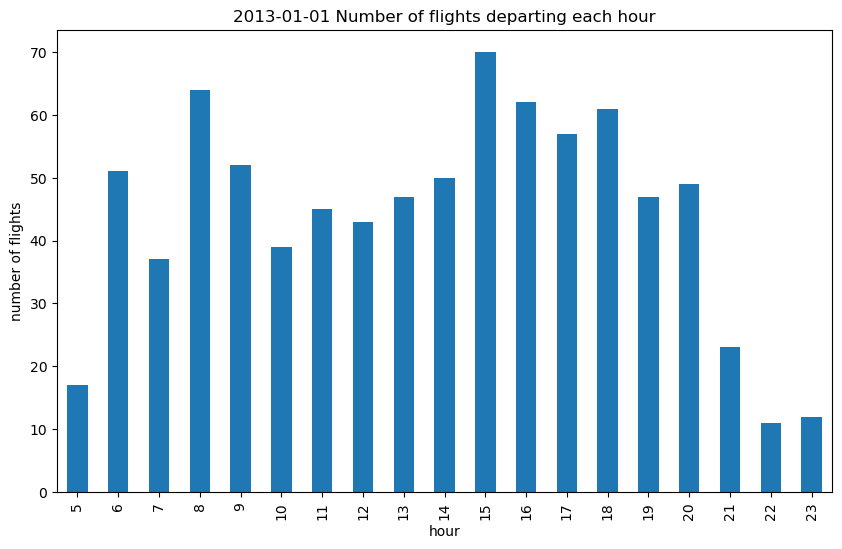

In [42]:
flight_count = flights_dt[flights_dt['departure'] < pd.to_datetime('2013-01-02')].copy()

# 從 dep_time 中提取小時並創建一個名為“hour”的新列
# pendulum.instance() 將 Pandas 的 Timestamp 對象轉換為 Pendulum 對象
flight_count['hour'] = flight_count['dep_time'].apply(lambda x: pendulum.instance(x, tz='UTC').hour)

flight_count = flight_count[['hour']]

plt.figure(figsize=(10, 6))
flight_count['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('number of flights')
plt.title('2013-01-01 Number of flights departing each hour')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16152\785138377.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  flight0101 = flights_dt[flights_dt['departure'] < pd.to_datetime('2013-01-02')].copy()


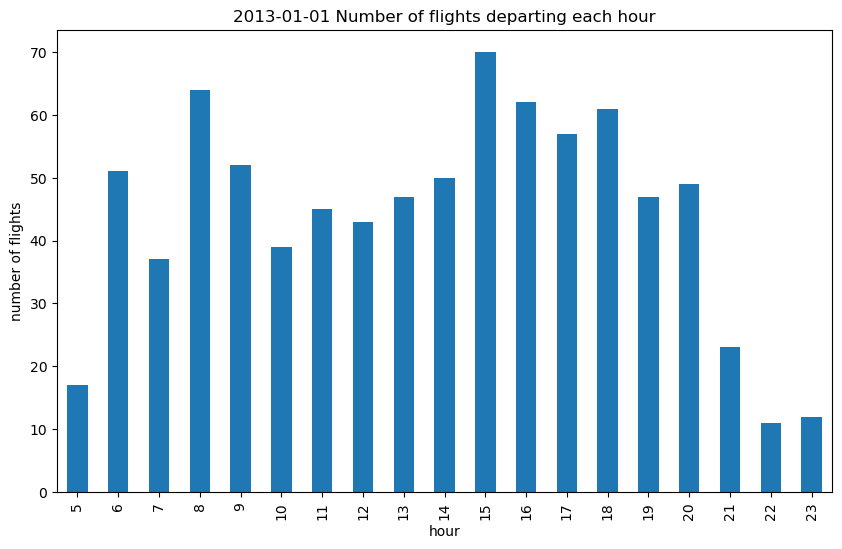

In [43]:
flight0101 = flights_dt[flights_dt['departure'] < pd.to_datetime('2013-01-02')].copy()
flight0101['freq_hour'] = flight0101['dep_time'].dt.hour

# Count flights for each hour
flight_counts = flight0101['freq_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
flight_count['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('number of flights')
plt.title('2013-01-01 Number of flights departing each hour')
plt.show()

## 設定時間元素
設定或更新日期/時間的元素：

In [44]:
datetime = pendulum.parse("2017-07-08 12:35:56")

datetime = datetime.set(year=2023)
datetime = datetime.set(month=1)
datetime = datetime.add(hours=1)
print(datetime)

2023-01-08T13:35:56+00:00


利用 .replace() 一次更新多個元素

In [45]:
datetime = datetime.replace(year=2024, month=2, day=2, hour=2)
print(datetime)

2024-02-02T02:35:56+00:00


In [46]:
date = pendulum.parse("2015-02-01")
date = date.add(days=30)
print(date)

2015-03-03T00:00:00+00:00


In [47]:
datetime = pendulum.parse("2015-02-01")
datetime = datetime.add(hours=400)
print(datetime)

2015-02-17T16:00:00+00:00


可顯示一年中 24 小時的航班分佈

C:\Users\user\AppData\Local\Temp\ipykernel_16152\2323884962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_dt['dep_time'] = pd.to_datetime(flights_dt['dep_time'])


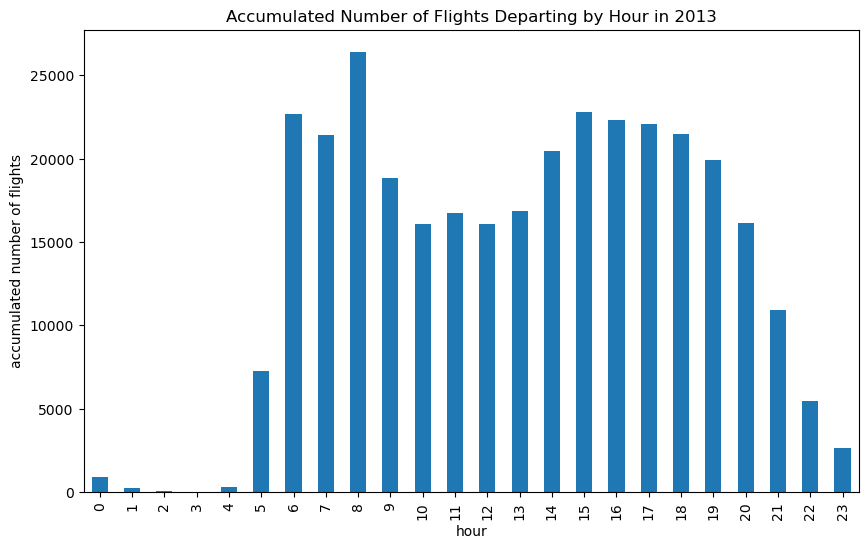

In [48]:
# 將 dep_time 列轉換為datetime類型
flights_dt['dep_time'] = pd.to_datetime(flights_dt['dep_time'])

# 篩選 2013 年的航班
flights_2013 = flights_dt[flights_dt['dep_time'].dt.year == 2013]

# 從 dep_time 中提取小時
flights_2013['hour'] = flights_2013['dep_time'].dt.hour

# 統計每小時的航班數量
flight_count = flights_2013['hour'].value_counts().sort_index()

# 按小時繪製航班數
plt.figure(figsize=(10, 6))
flight_count.sort_index().plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('accumulated number of flights')
plt.title('Accumulated Number of Flights Departing by Hour in 2013')
plt.show()

# 時間間隔(Time spans)
接下來，我們將了解日期算法的工作原理，包括減法，加法和除法。在此過程中討論三種代表時間間隔的方式：
1. 持續時間(duration)，表示精確的秒數。
2. 時期(period)，代表人會使用的單位，如週和月。
3. 間隔(interval)，代表起點和終點。

## 持續時間(duration)

欲知 Emily 今年幾歲 ？

In [49]:
birth_date = pendulum.datetime(1996, 10, 14)
today = pendulum.today()
age = today.diff(birth_date).in_years()
print(age)

26


In [50]:
birth_date = pendulum.datetime(1996, 10, 14)
today = pendulum.today()
age = today.diff(birth_date).in_days()
print(age)

9760


In [51]:
today.diff(birth_date).in_seconds()

843235200

In [52]:
today.diff(birth_date).in_minutes()

14053920

In [53]:
today.diff(birth_date).in_hours()

234232

In [54]:
today.diff(birth_date).in_weeks()

1394

持續時間可以相加和相乘：

In [55]:
3 * age

29280

In [56]:
age + age + age

29280

In [57]:
today = pendulum.today()
tomorrow = today.add(days=1)
last_year = today.add(days=-1)
print(tomorrow)
print(last_year)

2023-07-06T00:00:00+08:00
2023-07-04T00:00:00+08:00


tz 代表的是時區，“America/New_York” 代表美國紐約時間，“Asia/Taipei” 代表台灣時間。詳見後面章節。

In [58]:
one_pm_NY = pendulum.datetime(2016, 3, 12, 13, 0, 0, tz="America/New_York")
tomorrow_NY = one_pm_NY.add(days=1)
print(tomorrow_NY)

2016-03-13T13:00:00-04:00


+ 如果是夏令時，我們將時間再向後調整一個小時

In [59]:
one_pm_NY = pendulum.datetime(2016, 3, 12, 13, 0, 0, tz="America/New_York")
tomorrow_NY = one_pm_NY.add(days=1)

# 考慮夏令時調整的情況
if tomorrow_NY.is_dst():
    tomorrow_NY = tomorrow_NY.add(hours=1)

print(tomorrow_NY)

2016-03-13T14:00:00-04:00


In [60]:
one_pm_TW = pendulum.datetime(2016, 3, 12, 13, 0, 0, tz="America/New_York")
tomorrow_TW = one_pm_TW.add(days=1)
print(tomorrow_TW)

2016-03-13T13:00:00-04:00


```
為什麼美國的時間 3 月 13 日下午 1 點的一天後，會變成 3 月 13 日下午 2 點？！
如果仔細查看日期，應該會注意到時區已更改。由於該時區 DST(夏日節約時間，Daylight Savings Time)，
3 月 12 日只有 23 個小時，所以如果我們加上一整天的秒數，我們就會得到不同的時間。
```

# 時期(period)
在 Pendulum 中，"時期"（Period）是指表示時間跨度的對象。它可以表示一段時間，例如幾分鐘、幾天、幾個月或幾年。

你可以使用 pendulum.Duration() 方法創建一個時間跨度：

In [61]:
duration = pendulum.Duration(days=5, hours=3, minutes=30)
print(duration)

5 days 3 hours 30 minutes


Duration 對象是可變的，可以與 Datetime 對象進行加法和減法操作

In [62]:
period1 = pendulum.Duration(days=5, hours=3, minutes=30)
period2 = pendulum.Duration(hours=2)

# 加法
result = period1 + period2
print(result)  # 输出: P5DT5H30M

# 减法
result = period1 - period2
print(result) 

# 乘法
print(10 * (period1 - period2))

# 除法
duration = pendulum.duration(years=1)
days_in_seconds = pendulum.duration(days=365).in_seconds()
result = duration.in_seconds() / days_in_seconds
print(result)

5 days 5 hours 30 minutes
5 days 1 hour 30 minutes
7 weeks 1 day 15 hours
1.0


**提醒 : 2016 年為閏年**

In [63]:
date = pendulum.parse("2016-01-01")
new_date = date.add(years=1)
print(new_date)

2017-01-01T00:00:00+00:00


+ 一年的時間間隔，可以使用 relativedelta 函數

In [64]:
from dateutil.relativedelta import relativedelta
import datetime

delta = relativedelta(years=1)
print(delta + date)

2017-01-01T00:00:00+00:00


+ 一年的時間跨度，可以使用 datetime.timedelta 來表示

In [65]:
import datetime

delta = datetime.timedelta(days=365)
print(delta + date)

2016-12-31T00:00:00+00:00


relativedelta 的優點是它可以處理閏年的情況，而使用 datetime.timedelta 表示一年的時間跨度時是一個近似值

將任何間隔轉換為特定的時期 : .in_months()

In [66]:
start_date = pendulum.parse("2016-01-01")
end_date = pendulum.parse("2017-02-02 01:01:01")

leap = end_date.diff(start_date)
years = leap.in_years()

print(years)
print(leap.in_months())
print(leap.in_days())
print(leap.in_hours())

1
13
398
9553


構造時期可使用以下函數：

+ in_words() 方法將其轉換為可讀的字符串表示形式

In [67]:
duration = end_date - start_date 
period = duration.in_words(locale="en")
print(duration)
print(period)

<Period [2016-01-01T00:00:00+00:00 -> 2017-02-02T01:01:01+00:00]>
1 year 1 month 1 day 1 hour 1 minute 1 second


+ pendulum.duration()

In [68]:
duration = pendulum.duration(seconds=15)
print(duration)

15 seconds


In [69]:
duration = pendulum.duration(minutes=10)
print(duration)

10 minutes


In [70]:
duration = pendulum.duration(hours=12)
print(duration)

12 hours


In [71]:
duration = pendulum.duration(days=7)
print(duration)

1 week


In [72]:
duration = pendulum.duration(weeks=3)
print(duration)

3 weeks


In [73]:
duration = pendulum.duration(months=5)
print(duration)

5 months


In [74]:
duration = pendulum.duration(years=2)
print(duration)

2 years


以下的例子顯示有些飛機在離開紐約市之前似乎已到達目的地。我們將使用時期更正航班日期相關的奇怪現象。

In [75]:
# 過濾 arr_time 小於 dep_time 的行
filtered_flights = flights_dt[flights_dt['arr_time'] < flights_dt['dep_time']]
filtered_flights.head(10)

,origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,departure,wday
719,EWR,BQN,9.0,-4.0,2013-01-01 19:29:00+00:00,2013-01-01 19:20:00+00:00,2013-01-01 00:03:00+00:00,2013-01-01 00:07:00+00:00,192.0,2013-01-01,Tuesday
725,JFK,DFW,59.0,NaN,2013-01-01 19:39:00+00:00,2013-01-01 18:40:00+00:00,2013-01-01 00:29:00+00:00,2013-01-01 21:51:00+00:00,NaN,2013-01-01,Tuesday
791,EWR,TPA,-2.0,9.0,2013-01-01 20:58:00+00:00,2013-01-01 21:00:00+00:00,2013-01-01 00:08:00+00:00,2013-01-01 23:59:00+00:00,159.0,2013-01-01,Tuesday
794,EWR,SJU,-6.0,-12.0,2013-01-01 21:02:00+00:00,2013-01-01 21:08:00+00:00,2013-01-01 01:46:00+00:00,2013-01-01 01:58:00+00:00,199.0,2013-01-01,Tuesday
797,EWR,SFO,11.0,-14.0,2013-01-01 21:08:00+00:00,2013-01-01 20:57:00+00:00,2013-01-01 00:25:00+00:00,2013-01-01 00:39:00+00:00,354.0,2013-01-01,Tuesday
804,LGA,FLL,-10.0,-2.0,2013-01-01 21:20:00+00:00,2013-01-01 21:30:00+00:00,2013-01-01 00:16:00+00:00,2013-01-01 00:18:00+00:00,160.0,2013-01-01,Tuesday
805,EWR,MCO,41.0,43.0,2013-01-01 21:21:00+00:00,2013-01-01 20:40:00+00:00,2013-01-01 00:06:00+00:00,2013-01-01 23:23:00+00:00,143.0,2013-01-01,Tuesday
807,JFK,LAX,-7.0,-24.0,2013-01-01 21:28:00+00:00,2013-01-01 21:35:00+00:00,2013-01-01 00:26:00+00:00,2013-01-01 00:50:00+00:00,338.0,2013-01-01,Tuesday
810,EWR,FLL,49.0,28.0,2013-01-01 21:34:00+00:00,2013-01-01 20:45:00+00:00,2013-01-01 00:20:00+00:00,2013-01-01 23:52:00+00:00,152.0,2013-01-01,Tuesday
811,EWR,FLL,-9.0,-14.0,2013-01-01 21:36:00+00:00,2013-01-01 21:45:00+00:00,2013-01-01 00:25:00+00:00,2013-01-01 00:39:00+00:00,154.0,2013-01-01,Tuesday


這些其實是隔夜航班。我們對出發和到達時間使用了相同的日期，但這些航班其實是在第二天到達。<br>
我們可以通過增加 days(1) 每個夜間航班的到達時間解決這個問題。 <br>
+ 提醒：overnight 是T/F，overnight*1 後變1/0

+ pd.to_timedelta() 將整數、字符串和列表轉換為 Timedelta 對象

In [76]:
# 根據條件 arr_time < dep_time 創建一個新列“overnight”
flights_dt['overnight'] = np.where(flights_dt['arr_time'] < flights_dt['dep_time'], True, False)

# 將基於 “overnight” 值的天數添加到 arr_time 和 sched_arr_time (乘以 1，1 天的時間跨度）
flights_dt['arr_time'] = flights_dt['arr_time'] + pd.to_timedelta(flights_dt['overnight'] * 1, unit='d')
flights_dt['sched_arr_time'] = flights_dt['sched_arr_time'] + pd.to_timedelta(flights_dt['overnight'] * 1, unit='d')

flights_dt

C:\Users\user\AppData\Local\Temp\ipykernel_16152\3770705737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_dt['overnight'] = np.where(flights_dt['arr_time'] < flights_dt['dep_time'], True, False)
C:\Users\user\AppData\Local\Temp\ipykernel_16152\3770705737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_dt['arr_time'] = flights_dt['arr_time'] + pd.to_timedelta(flights_dt['overnight'] * 1, unit='d')
C:\Users\user\AppData\Local\Temp\ipykernel_16152\3770705737.py:6: SettingWithCopyWarni

,origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,departure,wday,overnight
0,EWR,IAH,2.0,11.0,2013-01-01 05:17:00+00:00,2013-01-01 05:15:00+00:00,2013-01-01 08:30:00+00:00,2013-01-01 08:19:00+00:00,227.0,2013-01-01,Tuesday,False
1,LGA,IAH,4.0,20.0,2013-01-01 05:33:00+00:00,2013-01-01 05:29:00+00:00,2013-01-01 08:50:00+00:00,2013-01-01 08:30:00+00:00,227.0,2013-01-01,Tuesday,False
2,JFK,MIA,2.0,33.0,2013-01-01 05:42:00+00:00,2013-01-01 05:40:00+00:00,2013-01-01 09:23:00+00:00,2013-01-01 08:50:00+00:00,160.0,2013-01-01,Tuesday,False
3,JFK,BQN,-1.0,-18.0,2013-01-01 05:44:00+00:00,2013-01-01 05:45:00+00:00,2013-01-01 10:04:00+00:00,2013-01-01 10:22:00+00:00,183.0,2013-01-01,Tuesday,False
4,LGA,ATL,-6.0,-25.0,2013-01-01 05:54:00+00:00,2013-01-01 06:00:00+00:00,2013-01-01 08:12:00+00:00,2013-01-01 08:37:00+00:00,116.0,2013-01-01,Tuesday,False
...,...,...,...,...,...,...,...,...,...,...,...,...
336765,JFK,SYR,-5.0,-17.0,2013-09-30 22:40:00+00:00,2013-09-30 22:45:00+00:00,2013-09-30 23:34:00+00:00,2013-09-30 23:51:00+00:00,41.0,2013-09-30,Monday,False
336766,JFK,BUF,-10.0,-20.0,2013-09-30 22:40:00+00:00,2013-09-30 22:50:00+00:00,2013-09-30 23:47:00+00:00,2013-09-30 00:07:00+00:00,52.0,2013-09-30,Monday,False
336767,JFK,ROC,-5.0,-16.0,2013-09-30 22:41:00+00:00,2013-09-30 22:46:00+00:00,2013-09-30 23:45:00+00:00,2013-09-30 00:01:00+00:00,47.0,2013-09-30,Monday,False
336768,JFK,BOS,12.0,1.0,2013-09-30 23:07:00+00:00,2013-09-30 22:55:00+00:00,2013-09-30 23:59:00+00:00,2013-09-30 23:58:00+00:00,33.0,2013-09-30,Monday,False


現在我們所有的航班都遵守物理定律。

In [77]:
filtered_flights = flights_dt[(flights_dt['overnight'] == True) | (flights_dt['arr_time'] < flights_dt['dep_time'])]
filtered_flights.head(10)

,origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,departure,wday,overnight
719,EWR,BQN,9.0,-4.0,2013-01-01 19:29:00+00:00,2013-01-01 19:20:00+00:00,2013-01-02 00:03:00+00:00,2013-01-02 00:07:00+00:00,192.0,2013-01-01,Tuesday,True
725,JFK,DFW,59.0,NaN,2013-01-01 19:39:00+00:00,2013-01-01 18:40:00+00:00,2013-01-02 00:29:00+00:00,2013-01-02 21:51:00+00:00,NaN,2013-01-01,Tuesday,True
791,EWR,TPA,-2.0,9.0,2013-01-01 20:58:00+00:00,2013-01-01 21:00:00+00:00,2013-01-02 00:08:00+00:00,2013-01-02 23:59:00+00:00,159.0,2013-01-01,Tuesday,True
794,EWR,SJU,-6.0,-12.0,2013-01-01 21:02:00+00:00,2013-01-01 21:08:00+00:00,2013-01-02 01:46:00+00:00,2013-01-02 01:58:00+00:00,199.0,2013-01-01,Tuesday,True
797,EWR,SFO,11.0,-14.0,2013-01-01 21:08:00+00:00,2013-01-01 20:57:00+00:00,2013-01-02 00:25:00+00:00,2013-01-02 00:39:00+00:00,354.0,2013-01-01,Tuesday,True
804,LGA,FLL,-10.0,-2.0,2013-01-01 21:20:00+00:00,2013-01-01 21:30:00+00:00,2013-01-02 00:16:00+00:00,2013-01-02 00:18:00+00:00,160.0,2013-01-01,Tuesday,True
805,EWR,MCO,41.0,43.0,2013-01-01 21:21:00+00:00,2013-01-01 20:40:00+00:00,2013-01-02 00:06:00+00:00,2013-01-02 23:23:00+00:00,143.0,2013-01-01,Tuesday,True
807,JFK,LAX,-7.0,-24.0,2013-01-01 21:28:00+00:00,2013-01-01 21:35:00+00:00,2013-01-02 00:26:00+00:00,2013-01-02 00:50:00+00:00,338.0,2013-01-01,Tuesday,True
810,EWR,FLL,49.0,28.0,2013-01-01 21:34:00+00:00,2013-01-01 20:45:00+00:00,2013-01-02 00:20:00+00:00,2013-01-02 23:52:00+00:00,152.0,2013-01-01,Tuesday,True
811,EWR,FLL,-9.0,-14.0,2013-01-01 21:36:00+00:00,2013-01-01 21:45:00+00:00,2013-01-02 00:25:00+00:00,2013-01-02 00:39:00+00:00,154.0,2013-01-01,Tuesday,True


# 區間(interval)
有很多方式可以構造區間。 最簡單的方式是指定起迄時點：
+ pendulum.period(start, end)

In [78]:
start = pendulum.datetime(2022, 1, 1)
end = pendulum.datetime(2022, 12, 31)

period1 = pendulum.period(start, end)
print(period1)

<Period [2022-01-01T00:00:00+00:00 -> 2022-12-31T00:00:00+00:00]>


In [79]:
today = pendulum.today()
tomorrow = today.add(days=1)

time_diff = tomorrow - today
print(time_diff)

<Period [2023-07-05T00:00:00+08:00 -> 2023-07-06T00:00:00+08:00]>


創建了一個自定義的 TimeInterval 類

In [80]:
start = pendulum.datetime(2023, 1, 1)
end = pendulum.datetime(2023, 12, 31)

class TimeInterval:
    def __init__(self, start, end):
        self.start = start
        self.end = end

time_interval = TimeInterval(start, end)
print(time_interval.start)
print(time_interval.end)

2023-01-01T00:00:00+00:00
2023-12-31T00:00:00+00:00


In [81]:
start_date = pendulum.datetime(2011, 8, 10)
end_date = start_date.add(months=3)

duration = end_date - start_date
print(duration)

<Period [2011-08-10T00:00:00+00:00 -> 2011-11-10T00:00:00+00:00]>


討論兩區間的關係：
1. 一區間是否被另一區間完全涵蓋

In [82]:
start_date1 = pendulum.datetime(2011, 8, 10)
end_date1 = start_date1.add(months=5)

start_date2 = pendulum.datetime(2011, 9, 10)
end_date2 = start_date2.add(days=365)

interval1 = (start_date1, end_date1)
interval2 = (start_date2, end_date2)

is_within = interval1[0] >= interval2[0] and interval1[1] <= interval2[1]
print(is_within)

False


2. 兩區間是否重疊

In [83]:
overlap = (interval1[0] <= interval2[1]) and (interval1[1] >= interval2[0])
print(overlap)

True


## 小結

+ 如何在持續時間，時期和區間之間做選擇？
```
與往常一樣，選擇最簡單的數據結構來解決問題。如果使用者只關心物理時間，請用持續時間 ; 
如果使用者需要添加人類日常生活的時間，請使用一段時期 ; 
如果需要精確長度的持續時間，請使用區間。
```

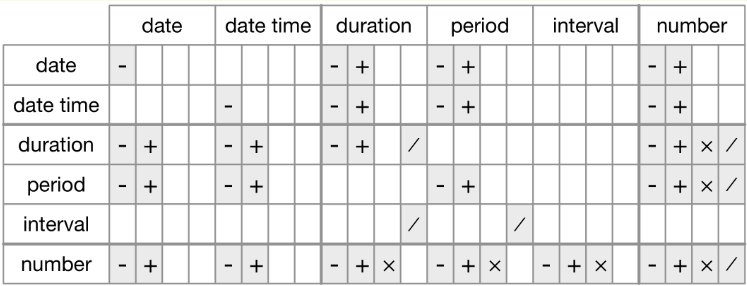

## 補充
+ 由於每個月的天數不同，所以在進行月份的加減操作時，日期可能會被調整以適應目標月份的天數

In [84]:
jan31 = pendulum.parse("2013-01-31")

dates = [jan31.add(months=i) for i in range(12)]
for date in dates:
    print(date)

2013-01-31T00:00:00+00:00
2013-02-28T00:00:00+00:00
2013-03-31T00:00:00+00:00
2013-04-30T00:00:00+00:00
2013-05-31T00:00:00+00:00
2013-06-30T00:00:00+00:00
2013-07-31T00:00:00+00:00
2013-08-31T00:00:00+00:00
2013-09-30T00:00:00+00:00
2013-10-31T00:00:00+00:00
2013-11-30T00:00:00+00:00
2013-12-31T00:00:00+00:00


In [85]:
dates = [jan31.subtract(months=i) for i in range(12)]
for date in dates:
    print(date)

2013-01-31T00:00:00+00:00
2012-12-31T00:00:00+00:00
2012-11-30T00:00:00+00:00
2012-10-31T00:00:00+00:00
2012-09-30T00:00:00+00:00
2012-08-31T00:00:00+00:00
2012-07-31T00:00:00+00:00
2012-06-30T00:00:00+00:00
2012-05-31T00:00:00+00:00
2012-04-30T00:00:00+00:00
2012-03-31T00:00:00+00:00
2012-02-29T00:00:00+00:00


或是利用函數，找出該月的最後一天

In [86]:
today = pendulum.today()

last_day = today.end_of("month")
print(last_day)

2023-07-31T23:59:59.999999+08:00


# 時區

pendulum 支持國際標準 IANA 時區。這些使用一致的命名方案 “/“，通常採用 ”州/城市“ 的形式。<br>
例如 “America / New_York”，“Europe / Paris” 和 “Asia / Taipei”

+ .timezone_name 可以找出 python 認為使用者當前時區

In [87]:
current_timezone = pendulum.now().timezone_name
print(current_timezone)

Asia/Taipei


查看所有時區名稱的完整列表，以下我們列出前六個

In [88]:
from pytz import all_timezones

timezone_names = all_timezones
print(len(timezone_names))
print(timezone_names[0:6])

596
['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera']


時區是僅控制顯示的日期時間的屬性。例如，這三個對象代表同一時刻：

In [89]:
x2 = pendulum.datetime(2015, 6, 1, 12, 0, 0, tz="America/New_York")
x1 = pendulum.datetime(2015, 6, 1, 18, 0, 0, tz="Europe/Copenhagen")
x3 = pendulum.datetime(2015, 6, 2, 4, 0, 0, tz="Pacific/Auckland")

可以使用 == 驗證它們是同一時間：

In [90]:
if x2 == x1 == x3:
    print("These dates and times represent the same moment.")
else:
    print("These dates and times do not represent the same moment.")

These dates and times represent the same moment.


除非另有說明，否則 pendulum 始終使用 UTC。<br>
UTC（協調世界時間）是科學界使用的標準時區，其大致相當於其前身GMT（格林威治標準時間）。<br>
它沒有 DST，這為計算提供了方便的表示。

有時我們希望在不同的時區顯示相同的時刻。再者，將現有時間與新時區相結合來創建新時刻。<br>
這些是由 in_timezone() 和 in_tz() 完成。

+ in_timezone()：將時間數據轉換為另一個時區的同一時間
+ in_tz()：將時間數據的時區強制轉換為另一個時區

從台北時間換成日本時間

In [91]:
time_Taipei = pendulum.datetime(2019, 2, 28, 9, 0, 0, tz='Asia/Taipei')
time_Tokyo = time_Taipei.in_timezone('Asia/Tokyo')
time_Tokyo

DateTime(2019, 2, 28, 10, 0, 0, tzinfo=Timezone('Asia/Tokyo'))

若錯把台北時間誤以為是日本時間，那再換回台北時間是幾點？

In [92]:
time_Taipei = pendulum.datetime(2019, 2, 28, 9, 0, 0, tz='Asia/Taipei')
mistake = time_Taipei.in_tz('Asia/Tokyo')
corrected = mistake.in_tz('Asia/Taipei')
print(mistake,"\n",corrected)

2019-02-28T10:00:00+09:00 
 2019-02-28T09:00:00+08:00


首先將台北時間強制轉換為東京時間，並將其保存在 mistake 變量中。<br>
然後，我們將 mistake 中的時間再次強制轉換回台北時間，並將結果保存在 corrected 變量中。

+ Pendulum 中的時區轉換是基於時間的，而不是僅僅改變時區名稱
+ 將時間從一個時區轉換到另一個時區可能會導致時間值發生變化
+ 時區轉換只是修改了時間數據的時區信息，而不會改變時間值本身

# 練習

## 不同時區在生活上的例子
Mike 安排在台灣早上 9 點透過 skype 與 Emily 開會。這在澳洲雪梨的 Emily 是幾點 ？

In [93]:
meeting = pendulum.parse("2011-07-01 09:00:00", tz="Asia/Taipei")
meeting_sydney = meeting.in_timezone("Australia/Sydney")

print(meeting_sydney)

2011-07-01T11:00:00+10:00


因此，會議在 Emily 那邊的時間是早上 11 點

如果 Emily 出錯並以為是在雪梨的 9 點開會該怎麼辦？ 那是 Mike 的幾點？

In [94]:
mistake = pendulum.parse("2011-07-01 09:00:00", tz="Australia/Sydney")
mistake_sydney = mistake.in_timezone("Asia/Taipei")

print(mistake_sydney)

2011-07-01T07:00:00+08:00


這樣她會早上 7 點打電話給 Mike !

Mike 打算從 2018 年 7 月 4 日到 2018 年 9 月 10 日在雪梨逗留：

In [95]:
arrive = pendulum.datetime(2018, 7, 4, 12, 0, 0, tz="Australia/Sydney")
print(arrive)
leave = pendulum.datetime(2018, 9, 10, 14, 0, 0, tz="Australia/Sydney")
print(leave)

2018-07-04T12:00:00+10:00
2018-09-10T14:00:00+10:00


In [96]:
sydney = pendulum.Period(arrive, leave)
print(sydney)

<Period [2018-07-04T12:00:00+10:00 -> 2018-09-10T14:00:00+10:00]>


而 Mike 在雪梨的朋友 John 從 7 月 20 日到 8 月底去家族旅遊，不在雪梨。

In [97]:
start = pendulum.datetime(2018, 7, 20, tz="Australia/Sydney")
end = pendulum.datetime(2018, 8, 31, tz="Australia/Sydney")
trip = pendulum.Period(start, end)
print(trip)

<Period [2018-07-20T00:00:00+10:00 -> 2018-08-31T00:00:00+10:00]>


Mike 的訪問會和 John 的旅行重疊嗎？ 是。

In [98]:
overlap = (arrive <= start) and (leave >= end)
print(overlap)

True


如果 Mike 想與 Emily 建立每週一次的例行會議，那麼接下來一個月的開會時間是：

In [99]:
meetings = [meeting + pendulum.duration(weeks=i) for i in range(6)]
print(meetings)

[DateTime(2011, 7, 1, 9, 0, 0, tzinfo=Timezone('Asia/Taipei')), DateTime(2011, 7, 8, 9, 0, 0, tzinfo=Timezone('Asia/Taipei')), DateTime(2011, 7, 15, 9, 0, 0, tzinfo=Timezone('Asia/Taipei')), DateTime(2011, 7, 22, 9, 0, 0, tzinfo=Timezone('Asia/Taipei')), DateTime(2011, 7, 29, 9, 0, 0, tzinfo=Timezone('Asia/Taipei')), DateTime(2011, 8, 5, 9, 0, 0, tzinfo=Timezone('Asia/Taipei'))]


## 處理真實的資料(作業)
+ 用附檔 USDJPY._M5_201901020605_201901040000.csv 計算 1 月 2 日每小時的成交量

# 參考資料
+ [Pendulum](https://pendulum.eustace.io/)
+ [Python处理时间的神器 —— Pendulum](https://zhuanlan.zhihu.com/p/420561184)

---